# Homework 3

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))
import numpy as np
import pandas as pd
from scipy import stats, signal

### Problem 1

In [4]:
df = pd.DataFrame(np.array([[45, 5], [3,47]]), columns= ['True Bird','True Person'], index = ['NN Bird', 'NN Person']);
print(df)

           True Bird  True Person
NN Bird           45            5
NN Person          3           47


In [9]:
df = pd.DataFrame(np.array([[47, 11], [1,42]]), columns= ['True Bird','True Person'], index = ['NA Bird', 'NA Person']);
print(df)

           True Bird  True Person
NA Bird           47           11
NA Person          1           42


**a) Which algorithm makes the fewest mistakes?**

Comparing the two algorithms, The NN algorithm makes the fewest mistakes. The NN algorithm miscategorizes 5 people as birds and 3 birds as people having a total of 8 miscategorizations. On the other hand, the NA mistakes 11 birds as people and 1 bird as a person having a total of 12 miscategorizations. 12 > 8 so the algorithm that has the fewest mistakes is the NN algorithm.

**b) Which algorithm is better for the zoo? Explain.**

When considering which algorithm is better for the zoo, the NA algorithm is much better. Since the goal of the algorithm is to prevent birds from escaping from the aviary door, having the algorithm detect more objects as birds aka humans in this case is much better than having birds being mistaken as people. In the case with the NN algorithm it mistakes 3 birds as people. This could mean possibly 3 birds escape from the zoo where the NA algorithm only mistakes 1 bird as a person. The NA algorithm is much better for the zoo that has a primary goal of keeping and identifying the birds even at the cost of locking in more people.

**c) During the pandemic the number of visitors plummets, and it is only the zoo keeper visiting. So instead of 52% of the photos taken at the aviary door being people, it is now only 1%**

Below are the truth tables in the event that only the zookeeper is present at the zoo due to COVID 19. 

In [6]:
df = pd.DataFrame(np.array([[92.8, 0.1], [6.2,0.9]]), columns= ['True Bird','True Person'], index = ['NN Bird', 'NN Person']);
print(df)

           True Bird  True Person
NN Bird         92.8          0.1
NN Person        6.2          0.9


In [10]:
df = pd.DataFrame(np.array([[96.9, 0.2], [2.1,0.8]]), columns= ['True Bird','True Person'], index = ['NA Bird', 'NA Person']);
print(df)

           True Bird  True Person
NA Bird         96.9          0.2
NA Person        2.1          0.8


The truth tables from only 1% of people (the zookeeper) being present only further strengthens the argument for the NA algorithm for the zoo. It identifies only 2 birds as people where as the NN algorithm mistakes 6 birds as people.

### Problem 2

**a) What is the pdf of the sum of two identical exponential distributions?**

According to Wikipedia, the pdf of the sum of two exponential variables $f_{X_1+X_2}(z) = \frac{\lambda_1\lambda_2}{\lambda_1-\lambda_2}(e^{-\lambda_1z}-e^{-\lambda_2z})$ stating that "probability distribution function (PDF) of a sum of two independent random variables is the convolution of their individual PDFs" which is the numerical approach we did from Lab 2.

Since we are looking at the case of two identical exponential distributions $\lambda_i = \lambda$, this distribution is called the Erlang distribution. 

https://en.wikipedia.org/wiki/Erlang_distribution

The Erlang distribution has a PDF shape determined by two parameters, k (how many exponential distributions we are summing) and $\mu$, the reciprocal of $\lambda$, which we know is an equivalent value between the two added exponential distributions.
Therefore, the PDF of the sum of two identical distributions is the Erlang distribution for ($k=2, \lambda$).

Below is a plot of one exponential and the sum of two exponentials.

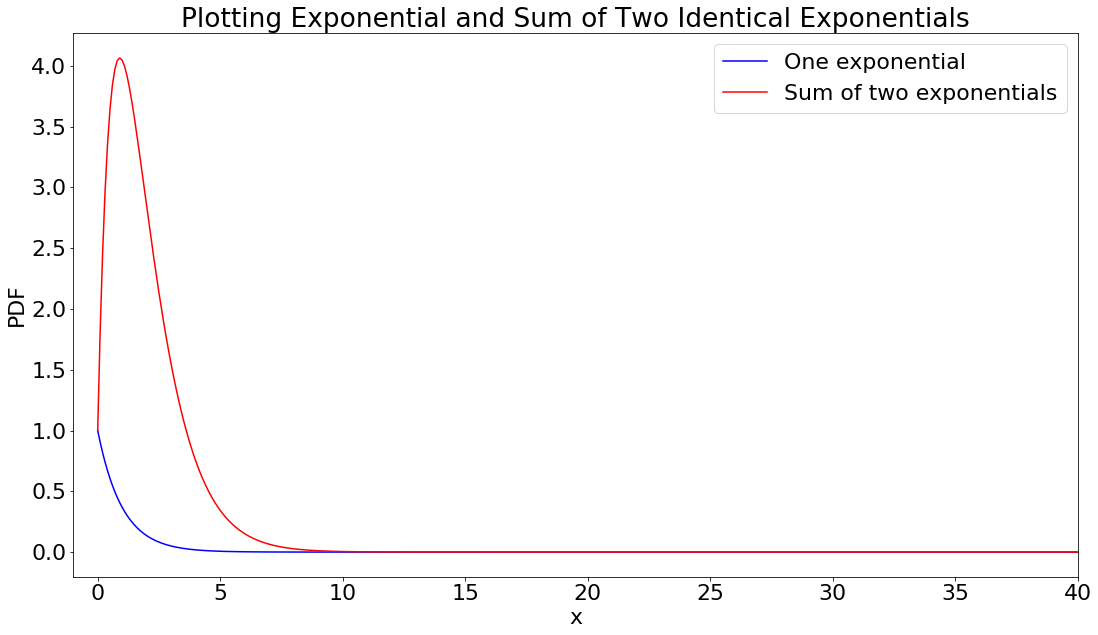

In [11]:
x = np.linspace(0,100,1001)
e1 = stats.expon.pdf(x)
sum_2 = signal.fftconvolve(e1,e1)
plt.plot(x, e1, 'b', label='One exponential')
plt.plot(np.linspace(0,200,len(sum_2)), sum_2, 'r', label='Sum of two exponentials')
plt.title('Plotting Exponential and Sum of Two Identical Exponentials');
plt.legend()
plt.xlim([-1,40]);
plt.xlabel('x');
plt.ylabel('PDF');

**b) What is the pdf of the ratio of two zero-mean unity variance normal distributions  $\frac{X_1}{X_2}$ ?**

We are given zero-mean $\mu = 0$ and unity variance(variance = 1) so $\sigma$ = 1. From Wolfram we know the pdf of zero-mean unity variance normal distribution to be$$P_1(x) = \frac{1}{\sqrt{2\pi}}e^{-x_1^2/2}$$Thus, a ratio of the two distributions will give$$P_{1,2} = e^{(x_2^2-x_1^2)/2}$$

https://en.wikipedia.org/wiki/Cauchy_distribution

Which is most similar to the Cauchy distribution which is defined on Wikipedia as the ratio of two independent normal distributions with a mean of 0.


**c)So far we have looked at 1D probability distributions, but it is possible to have a multi-dimensional vector distribution. A simple first introduction is the 2D Guassian; it looks like a smeared spot. Mathematically this is given by  $X$$\hat{i}$ + $Y$ $\hat{j}$ where both  $X$  and  $Y$  are drawn from 1D Gaussian distributions. If I measure the amplitude of this vector, what is its pdf? (Hint, the amplitude is always positive.)**


The amplitude of a vector is given by:

$\lvert V \rvert = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

This amplitude will always be positive since we are squaring the inside values and adding them up.

The Wiki page for a multivariable normal distribution: https://en.wikipedia.org/wiki/Multivariate_normal_distribution

The pdf of a 2D gaussian is $f(z) = \frac{1}{\lvert \sqrt{2 \pi \Sigma} \rvert} e^{-\frac{1}{2} (z-\mu)^T\Sigma^{-1}(z-\mu)}$ where $z = (x, y)$, $\mu = (\mu_x, \mu_y)$, and $\Sigma = E[(z-\mu)(z-\mu)^T]$ and is the covariance matrix.